In [52]:
!pip install apng

In [23]:
frogger = {(0,0):(255,255,255),
         (0,1):(0,255,0),
         (0,2):(255,255,255),
         (0,3):(255,255,255),
         (0,4):(0,255,0),
         (0,5):(0,255,0),
         (0,6):(0,255,0),
         (0,7):(0,255,0),
         (0,8):(255,255,255),
         (0,9):(255,255,255),
         (0,10):(0,255,0),
         (0,11):(255,255,255),
         (1,0):(0,255,0),
         (1,1):(0,255,0),
         (1,2):(255,255,255),
         (1,3):(255,0,0),
         (1,4):(0,255,0),
         (1,5):(0,255,0),
         (1,6):(0,255,0),
         (1,7):(0,255,0),
         (1,8):(255,0,0),
         (1,9):(255,255,255),
         (1,10):(0,255,0),
         (1,11):(0,255,0),
         (2,0):(255,255,255),
         (2,1):(0,255,0),
         (2,2):(255,255,255),
         (2,3):(0,255,0),
         (2,4):(0,255,0),
         (2,5):(0,255,0),
         (2,6):(0,255,0),
         (2,7):(0,255,0),
         (2,8):(0,255,0),
         (2,9):(255,255,255),
         (2,10):(0,255,0),
         (2,11):(255,255,255),
         (3,0):(255,255,255),
         (3,1):(0,255,0),
         (3,2):(0,255,0),
         (3,3):(0,255,0),
         (3,4):(0,255,0),
         (3,5):(0,255,0),
         (3,6):(0,255,0),
         (3,7):(0,255,0),
         (3,8):(0,255,0),
         (3,9):(0,255,0),
         (3,10):(0,255,0),
         (3,11):(255,255,255),
         (4,0):(255,255,255),
         (4,1):(255,255,255),
         (4,2):(255,255,255),
         (4,3):(0,255,0),
         (4,4):(0,255,0),
         (4,5):(0,255,0),
         (4,6):(0,255,0),
         (4,7):(0,255,0),
         (4,8):(0,255,0),
         (4,9):(255,255,255),
         (4,10):(255,255,255),
         (4,11):(255,255,255),
         (5,0):(255,255,255),
         (5,1):(0,255,0),
         (5,2):(0,255,0),
         (5,3):(0,255,0),
         (5,4):(0,255,0),
         (5,5):(0,255,0),
         (5,6):(0,255,0),
         (5,7):(0,255,0),
         (5,8):(0,255,0),
         (5,9):(0,255,0),
         (5,10):(0,255,0),
         (5,11):(255,255,255),
         (6,0):(255,255,255),
         (6,1):(0,255,0),
         (6,2):(255,255,255),
         (6,3):(0,255,0),
         (6,4):(0,255,0),
         (6,5):(0,255,0),
         (6,6):(0,255,0),
         (6,7):(0,255,0),
         (6,8):(0,255,0),
         (6,9):(255,255,255),
         (6,10):(0,255,0),
         (6,11):(255,255,255),
         (7,0):(0,255,0),
         (7,1):(0,255,0),
         (7,2):(255,255,255),
         (7,3):(255,255,255),
         (7,4):(0,255,0),
         (7,5):(0,255,0),
         (7,6):(0,255,0),
         (7,7):(0,255,0),
         (7,8):(255,255,255),
         (7,9):(255,255,255),
         (7,10):(0,255,0),
         (7,11):(0,255,0),
         (8,0):(255,255,255),
         (8,1):(0,255,0),
         (8,2):(255,255,255),
         (8,3):(255,255,255),
         (8,4):(255,255,255),
         (8,5):(255,255,255),
         (8,6):(255,255,255),
         (8,7):(255,255,255),
         (8,8):(255,255,255),
         (8,9):(255,255,255),
         (8,10):(0,255,0),
         (8,11):(255,255,255),
        
}

In [24]:
from PIL import Image
from IPython.display import display

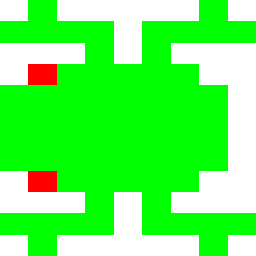

In [25]:
def save_image(image,filename='frogger.png',scale = None):
    img = Image.new('RGB',(9,12))
    
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            img.load()[x,y] = image[x,y]
    
    if scale:
        img = img.resize((256,256))
        
    img.save('outputs/'+filename)
    
save_image(frogger,scale=[300,300],filename='frogger.png')
display(Image.open('outputs/frogger.png'))

In [2]:
n = 8 #number of qubits needed for all the pixels

In [3]:
import numpy as np

L = int(2**(n/2))

grid = {}
for x in range(L):
    for y in range(L):
        grid[(x,y)] = ''

for (x,y) in grid:
    for j in range(n):
        if(j%2)==0:
            xx = np.floor(x/2**(j/2))
            grid[(x,y)] = str(int((xx + np.floor(xx/2) )%2 )) + grid[(x,y)]
        else:
            yy = np.floor(y/2**((j-1)/2))
            grid[(x,y)] = str(int((yy + np.floor(yy/2) )%2 )) + grid[(x,y)]

In [32]:
def image2state(image,grid):
    
    N = len(grid)
    state = [[0]*N,[0]*N,[0]*N] # different states for R, G, B
    
    for pos in image:
        for j in range(3):
            state[j][int(grid[pos],2)] = np.sqrt(image[pos][j]) #amplitude is square root of color value
                        
    for j in range(3):
        Z = sum(np.absolute(state[j])**2)
        state[j] = [amp / np.sqrt(Z) for amp in state[j]] #amplitudes are normalized
        
    return state

state = image2state(frogger,grid)

In [33]:
from qiskit import *

backend = Aer.get_backend('statevector_simulator')

In [34]:
def ket2counts (ket):
    
    counts = {}
    N = len(ket)
    n = int(np.log(N)/np.log(2) ) # qubit number 
    
    for j in range(N):
        string = bin(j)[2:]
        string = '0'*(n-len(string)) + string
        counts[string] = np.absolute(ket[j])**2 #probabilities = amplitudes^2
        
    return counts

In [35]:
q = QuantumRegister(n)

counts= []
for j in range(3):
    qc = QuantumCircuit(q)
    qc.initialize(state[j], q)
    job = execute(qc,backend)
    counts.append(ket2counts(job.result().get_statevector() )) 

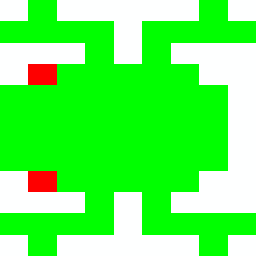

In [48]:
def counts2image(counts,grid):
    
    image = {pos:[0,0,0] for pos in grid}
    
    for j in range(3):
        
        rescale = 255/max(counts[j].values()) #max probability becomes value of 255
        
        for pos in image:
            try:
                image[pos][j] = int(rescale*counts[j][grid[pos]] )
            except:
                image[pos][j] = int(rescale*counts[j][grid[pos]] )
    for pos in image:
        image[pos] = tuple(image[pos])
            
    return image
    
save_image(counts2image(counts,grid), scale = [300,300], filename = 'frogger2.png')
display(Image.open('outputs/frogger2.png'))

In [49]:
frame_num = 30

In [64]:
from apng import APNG
import os

state = image2state(frogger,grid)

filenames = []

for f in range(frame_num):
    
    circuits = []
    
    for j in range(3):
        qc = QuantumCircuit(q)
        qc.initialize(state[j], q)
        qc.ry(2*np.pi*f/frame_num, q)
        circuits.append(qc)
        
    job = execute(circuits, backend)
    
    counts = []
    
    for j in range(3):
        counts.append(ket2counts(job.result().get_statevector(circuits[j])))
        
    frame = counts2image(counts,grid)
    
    filename = 'frame_'+str(f)+'.png'
    save_image(counts2image(counts,grid), scale =[300,300], filename = filename)
    filenames.append('outputs/'+ filename)
    
APNG.from_files(filenames, delay = 250).save('outputs/froggeranimation.png')

for file in filenames:
    os.remove(file)

